In [1]:
import pandas as pd

## Reading & Merging the Dataset 

In [9]:
#Reading the Call Transfer Data
callTransferDf = pd.read_excel("dataset/transfer_analysis.xlsx")

#Fill NA by Empty String
callTransferDf = callTransferDf.fillna("")

# using dictionary to convert specific columns 
convert_dict = {'phone.parent_connid': str, 
                'agent_1_user_id': str,
                'agent_1_vq': str,
                'agent_2_user_id': str,
                'agent_2_vq': str,
                'agent_3_user_id': str,
                'agent_3_vq': str,
                'agent_4_user_id': str,
                'agent_4_vq': str,
                'agent_5_user_id': str,
                'agent_5_vq': str,
               } 
callTransferDf = callTransferDf.astype(convert_dict)
callTransferDf.dtypes

Date                   datetime64[ns]
Hour                            int64
phone.parent_connid            object
agent_1_user_id                object
agent_1_vq                     object
agent_2_user_id                object
agent_2_vq                     object
agent_3_user_id                object
agent_3_vq                     object
agent_4_user_id                object
agent_4_vq                     object
agent_5_user_id                object
agent_5_vq                     object
phone.nps_score                object
dtype: object

In [10]:
#Size of Call Transfer DataSet
print("Size of DataSet:", len(callTransferDf))
callTransferDf.head()

Size of DataSet: 105748


,Date,Hour,phone.parent_connid,agent_1_user_id,agent_1_vq,agent_2_user_id,agent_2_vq,agent_3_user_id,agent_3_vq,agent_4_user_id,agent_4_vq,agent_5_user_id,agent_5_vq,phone.nps_score
0,2012-09-01,7,testf021394193fa3,90105611.0,biz_value,,,,,,,,,9
1,2012-09-01,8,test90213933f20b3,90038632.0,biz_value,,,,,,,,,
2,2012-09-01,8,testb021393b0a0a8,90105611.0,biz_value,,,,,,,,,
3,2012-09-01,8,teste021394422035,90371668.0,biz_value,,,,,,,,,
4,2012-09-01,8,testf021394193ffe,90371668.0,biz_value,,,,,,,,,


In [11]:
#Reading the Repeat Caller Dataset
repeatCallerDf = pd.read_excel("dataset/repeat_caller_analysis.xlsx")
#Fill NA by Empty String
repeatCallerDf = repeatCallerDf.fillna("")

In [12]:
print("Size of Repeat Caller data:",len(repeatCallerDf))
repeatCallerDf.head()

Size of Repeat Caller data: 42141


,Has Repeat Call,Type,phone.fnn,Date,Hour,phone.parent_connid,phone.dnis,phone.nps_score,phone.nps_resolution
0,No,Initial,4.13848e+09,2012-10-22,12,testa021734bcb7af,180022000,,
1,No,Initial,4.1409e+09,2012-10-11,20,testa021393bdaac3,180022000,8,1
2,No,Initial,4.17721e+09,2012-10-22,2,testa021734bc9936,180022000,,
3,Yes,Initial,4.21235e+09,2012-10-17,16,testa021734bb5db6,180029990,,
4,No,Repeat,4.21235e+09,2012-10-20,10,test9021734aaa0a1,180029990,,


In [13]:
#Merge the 2 data frames 
dataset = pd.merge(callTransferDf, repeatCallerDf, on=['Date','Hour','phone.parent_connid'],how="left")
#Fill NA by Empty String
dataset = dataset.fillna("")

In [14]:
print("Size of Merged Dataset:", len(dataset))
dataset.head()

Size of Merged Dataset: 105748


,Date,Hour,phone.parent_connid,agent_1_user_id,agent_1_vq,agent_2_user_id,agent_2_vq,agent_3_user_id,agent_3_vq,agent_4_user_id,agent_4_vq,agent_5_user_id,agent_5_vq,phone.nps_score_x,Has Repeat Call,Type,phone.fnn,phone.dnis,phone.nps_score_y,phone.nps_resolution
0,2012-09-01,7,testf021394193fa3,90105611.0,biz_value,,,,,,,,,9,,,,,,
1,2012-09-01,8,test90213933f20b3,90038632.0,biz_value,,,,,,,,,,,,,,,
2,2012-09-01,8,testb021393b0a0a8,90105611.0,biz_value,,,,,,,,,,,,,,,
3,2012-09-01,8,teste021394422035,90371668.0,biz_value,,,,,,,,,,,,,,,
4,2012-09-01,8,testf021394193ffe,90371668.0,biz_value,,,,,,,,,,,,,,,


## Total Calls Transferred (Considering Just First two transfers)

In [17]:
noOfCallsTransferred = dataset[(dataset["agent_1_vq"] != "") & (dataset["agent_2_vq"] != "")]
print("Number of Calls transferred across agents:", len(noOfCallsTransferred))

Number of Calls transferred across agents: 20497


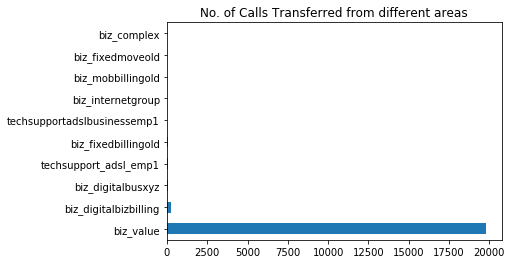

In [20]:
#Calls transferred
noOfCallsTransferred["agent_1_vq"].value_counts()[:10].plot(kind='barh',
                                                                title="No. of Calls Transferred from different areas",
                                                               )

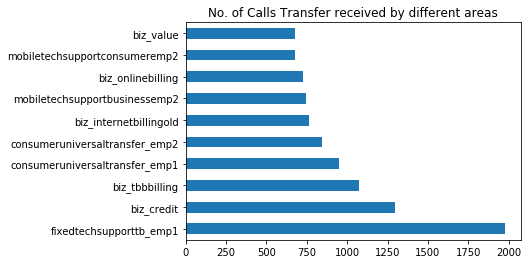

In [19]:
#To where calls are getting transferred
noOfCallsTransferred["agent_2_vq"].value_counts()[:10].plot(kind='barh',
                                                                title="No. of Calls Transfer received by different areas",
                                                               )

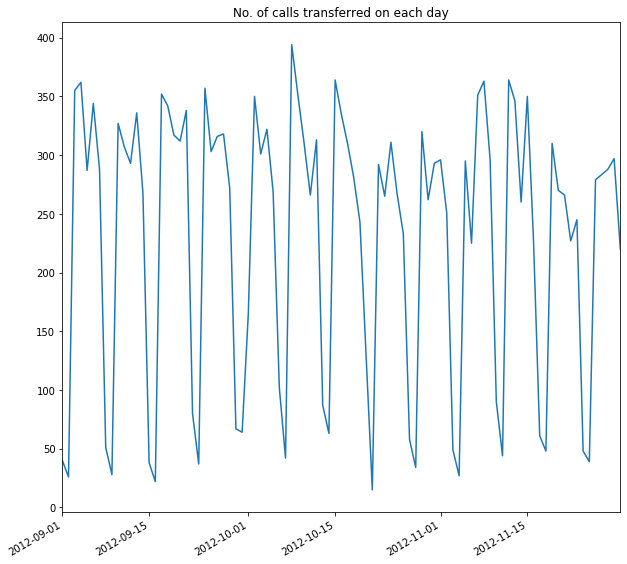

In [22]:
noOfCallsTransferred["Date"].value_counts().plot(figsize=(10,10), title="No. of calls transferred on each day")

## Calls Transferred from Outside to biz_value 

In [23]:
#Filter entries which are transferred from OutSide to biz_value 
transferFromOutsideTobiz = noOfCallsTransferred[(noOfCallsTransferred["agent_1_vq"] != "biz_value") & (noOfCallsTransferred["agent_2_vq"] == "biz_value")]
print("Calls Transferred from Outside to biz_value=", len(transferFromOutsideTobiz))
transferFromOutsideTobiz.head()

Calls Transferred from Outside to biz_value= 518


,Date,Hour,phone.parent_connid,agent_1_user_id,agent_1_vq,agent_2_user_id,agent_2_vq,agent_3_user_id,agent_3_vq,agent_4_user_id,agent_4_vq,agent_5_user_id,agent_5_vq,phone.nps_score_x,Has Repeat Call,Type,phone.fnn,phone.dnis,phone.nps_score_y,phone.nps_resolution
418,2012-09-03,9,testa021393b00d21,90033770.0,biz_digitalbizbilling,90020220.0,biz_value,,,,,,,9,,,,,,
527,2012-09-03,10,testb021393b0efb7,90368619.0,biz_digitalbizbilling,90020220.0,biz_value,,,,,,,,,,,,,
1105,2012-09-03,13,test90213933f8e08,90712673.0,biz_digitalbusxyz,90983831.0,biz_value,90338638.0,biz_digitalbussales,,,,,,,,,,,
1858,2012-09-03,17,testd021393fc2412,90033770.0,biz_digitalbizbilling,90187656.0,biz_value,,,,,,,,,,,,,
2018,2012-09-03,18,test00213944d9ca4,90264602.0,biz_digitalbizbilling,90394631.0,biz_value,90817397.0,biz_fixedsalesold,,,,,,,,,,,


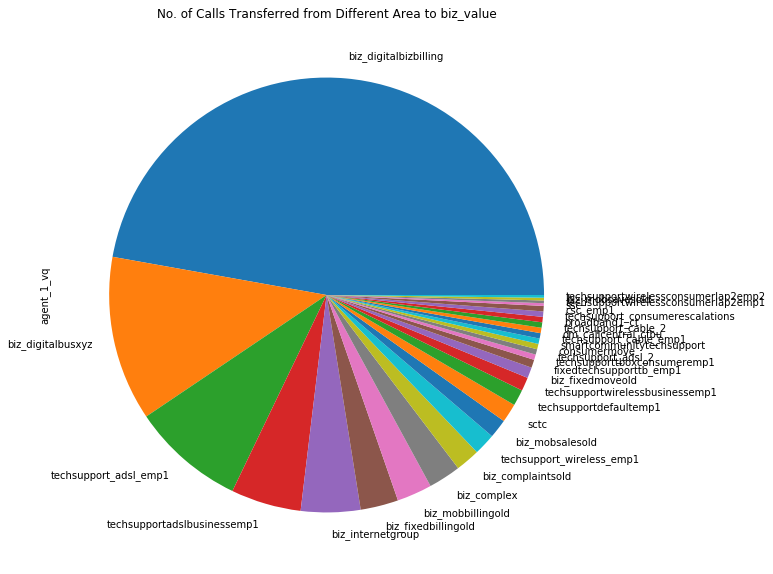

In [24]:
#From where calls are getting transferred to biz_value agent
transferFromOutsideTobiz["agent_1_vq"].value_counts()[:30].plot(kind='pie',
                                                                title="No. of Calls Transferred from Different Area to biz_value",
                                                                figsize=(10,10)
                                                               )

## Calls Transferred from biz_value to Outside 

In [25]:
#Filter entries which are transferred from biz_value to outside
transferFrombizToOutside = noOfCallsTransferred[(noOfCallsTransferred["agent_1_vq"] == "biz_value") & (noOfCallsTransferred["agent_2_vq"] != "biz_value")]
print("Calls Transferred from biz_value to outside=", len(transferFrombizToOutside))
transferFrombizToOutside.head()

Calls Transferred from biz_value to outside= 19625


,Date,Hour,phone.parent_connid,agent_1_user_id,agent_1_vq,agent_2_user_id,agent_2_vq,agent_3_user_id,agent_3_vq,agent_4_user_id,agent_4_vq,agent_5_user_id,agent_5_vq,phone.nps_score_x,Has Repeat Call,Type,phone.fnn,phone.dnis,phone.nps_score_y,phone.nps_resolution
13,2012-09-01,9,testc021393d4d2c8,90958375.0,biz_value,90393633.0,biz_mobbilling,,,,,,,10,,,,,,
14,2012-09-01,9,teste021394422279,90744617.0,biz_value,90108607.0,mobiletechsupportbusinessemp2,,,,,,,,,,,,,
20,2012-09-01,10,test90213933f25c0,90200651.0,biz_value,90427662.0,mobiletechsupportconsumeremp2,,,,,,,,,,,,,
23,2012-09-01,10,testa021393afc49c,90366668.0,biz_value,90336652.0,customersupportpostpaidsupport,,,,,,,,,,,,,
29,2012-09-01,10,testc021393d4d486,90324617.0,biz_value,90121650.0,biz_internetbillingold,,,,,,,0,,,,,,


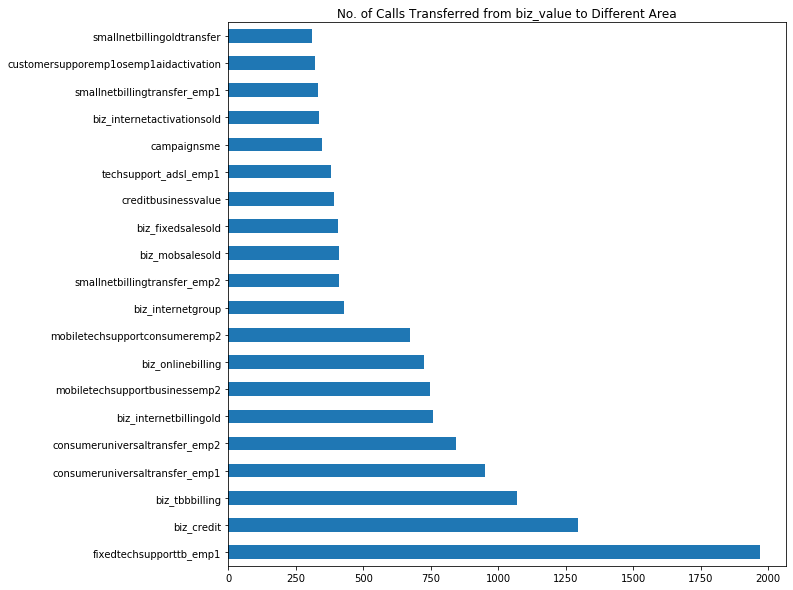

In [26]:
#Calls transferred from biz_value agent to outside area
transferFrombizToOutside["agent_2_vq"].value_counts()[:20].plot(kind='barh',
                                                                title="No. of Calls Transferred from biz_value to Different Area",
                                                                figsize=(10,10)
                                                               )

In [27]:
# Imapct of repeat calling on call forwarding
# Calls transferred from biz_value agent to outside agents, 
# how many of those calls are from repeat caller
transferFrombizToOutside["Type"].value_counts()

           19503
Initial      120
Repeat         2
Name: Type, dtype: int64

## Any biz_value Agent transferring max calls?

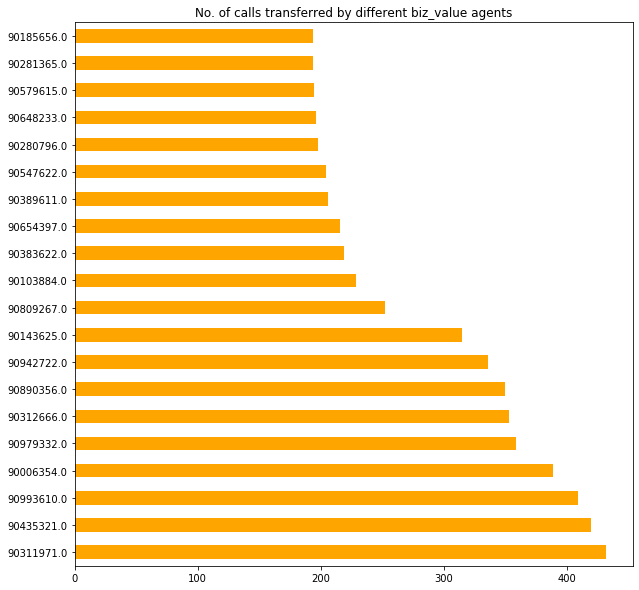

In [28]:
#From where calls are transferred to biz_value agent
transferFrombizToOutside["agent_1_user_id"].value_counts()[:20].plot(kind='barh',
                                                                title="No. of calls transferred by different biz_value agents",
                                                                figsize=(10,10), color="orange"
                                                               )